In [1]:


def parse(fn):
    d=open(fn).read().split('\n')
    N={}
    N["nodes"]={}
    for l in d:
        n,t=l.split(" -> ")
        if n[0]=='%':
            e={}
            e["type"]="flip-flop"
            e["state"]=0
            e["targets"]=t.split(", ")
            N["nodes"][n[1:]]=e
        elif n[0]=='&':
            e={}
            e["type"]="conjunction"
            e["memory"]={}
            e["targets"]=t.split(", ")
           
            N["nodes"][n[1:]]=e
        else:
            e={}
            e["type"]="broadcaster"
            e["targets"]=t.split(", ")
           
            N["nodes"][n]=e
    #print(N)
    missing=[]
    for k in N["nodes"].keys():
        for tgt in N["nodes"][k]["targets"]:
            if not tgt in N["nodes"]:
                missing.append(tgt)
            if tgt in N["nodes"]:    
                if N["nodes"][tgt]["type"]=="conjunction":
                    N["nodes"][tgt]["memory"][k]=0
    for tgt in missing:
        e={}
        e["type"]="broadcaster"
        e["targets"]=[]
        N["nodes"][tgt]=e
    
    N['P']=[]
    N['S']=[]
    return N




def process(N):
    while len(N['S']):
        v,s,t=N['S'][0]
        N['S']=N['S'][1:]
        if N["nodes"][t]["type"]=="broadcaster":
            for tgt in N["nodes"][t]["targets"]:
                N['S'].append((v,t,tgt))
        elif N["nodes"][t]["type"]=="flip-flop":
            if v==0:
                N["nodes"][t]["state"]= not N["nodes"][t]["state"]
                for tgt in N["nodes"][t]["targets"]:
                    N['S'].append((N["nodes"][t]["state"] ,t,tgt))
                    
        elif N["nodes"][t]["type"]=="conjunction":
            N["nodes"][t]["memory"][s]=v
            
            o=0
            for vv in N["nodes"][t]["memory"].values():
                if vv==0:
                    o=1
                    break
            for tgt in N["nodes"][t]["targets"]:
                N['S'].append((o,t,tgt))
                
        else:
            assert(0)
        N['P'].append((v,s,t))
    return N

def p1(fn):
    N=parse(fn)
    #print("parsed")
    for i in range(1000):
        N['S'].append((0,"button","broadcaster"))
        N=process(N)
    
    
    
    a=[0,0]
    for v,s,t in N['P']:
        #print(v,s,t)
        a[v]+=1
    return a[0]*a[1]
    
    return p1


                           
print("p1:",p1("20.txt"),883726240)

 
    
                            

p1: 883726240 883726240


fin


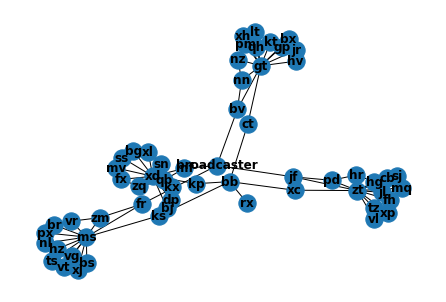

In [2]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt


def tst(fn):
    N=parse(fn)
    G = nx.Graph()
    for k in N["nodes"].keys():
        n=N["nodes"][k]
        G.add_node(k)
    for k in N["nodes"].keys():
        n=N["nodes"][k]
        for tgt in n["targets"]:
            G.add_edge(k,tgt)
    nx.draw(G, with_labels=True, font_weight='bold')
    print("fin")
    
tst("20.txt")    
            
#examine grafh and see bb has 4 suppliers that seem to be periodic



In [3]:
def p2(fn):
    N=parse(fn)
    #print("parsed")
    presses=0
    j=0
    A={}
    for i in range(1000000):
        N['S'].append((0,"button","broadcaster"))
        presses+=1
        N=process(N)
        while j<len(N['P']):
            v,s,t=N['P'][j]
            if v==1 and t=="bb":
                print("after",presses,s,t,v)
                if s not in A:
                    A[s]=presses
                    if len(A.keys())==4:
                        r=1
                        for k in A.keys():
                            r*=A[k]
                        return r
            j+=1
    return None

print("p2:",p2("20.txt"),211712400442661)


after 3733 kp bb 1
after 3797 ct bb 1
after 3823 xc bb 1
after 3907 ks bb 1
p2: 211712400442661 211712400442661
